# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from prompt_toolkit.renderer import HeightIsUnknownError

h_laser_arr = np.array([22.254, 22.261, 22.259, 22.261, 22.257])
h_laser = np.mean(h_laser_arr)
h_laser_sig = np.std(h_laser_arr) / np.sqrt(len(h_laser_arr))

h_tape_arr = np.array([22.1511, 22.1515])
h_tape = np.mean(h_tape_arr)
h_tape_sig = np.std(h_tape_arr) / np.sqrt(len(h_tape_arr))

h_top_off_weight, sig_h_top_off_weight = np.array([67.49]) - 56, ...
height_weight, sig_height_weight = np.array([59.05]) - 56, ...

In [3]:
# Example file location
filenames = ['Laurits.dat',
'Martin.dat',
'Sofie.dat',
'Timer.dat',
'Timer2.dat']

## Data reader

In [26]:
# Read in data
def read_data(filename):
    file_path = '/Users/lauritsfauli/PycharmProjects/Appstat-project/Project/Pendulum/pendulum-timing/' + filename
    dat = np.genfromtxt(file_path, delimiter='\t', names=('n', 't_s'))
    if filename == 'Timer.dat':
        #adding 1 to all n values after the third entry
        dat = np.genfromtxt(file_path, delimiter='\t', names=('n', 't_s'))
        n_new = np.copy(dat['n'])
        n_new[3:] = n_new[3:] + 1
        dat = np.array(list(zip(n_new, dat['t_s'])), dtype=[('n', int), ('t_s', float)])
    if filename == 'Sofie.dat':
        #removing the last entry
        dat = np.genfromtxt(file_path, delimiter='\t', names=('n', 't_s'))
        dat = dat[:-1]
    #making all measurements start at t = 0
    dat['t_s'] =  dat['t_s'] -  dat['t_s'][0]

    return dat

def time_diff(t):
    dt = t[1:] - t[:-1]
    # eliminating all timedifferences greater than 1.5 seconds from the mean
    mean_dt = np.mean(dt)
    dt_clean = dt[np.abs(dt - mean_dt) < 1.5 ]
    n_dt = np.arange(0, len(dt_clean)) + 0.5
    sig_dt = np.std(dt_clean)
    return n_dt, dt_clean, sig_dt

## Read and plot the data

Text(0, 0.5, 'Residial time (s)')

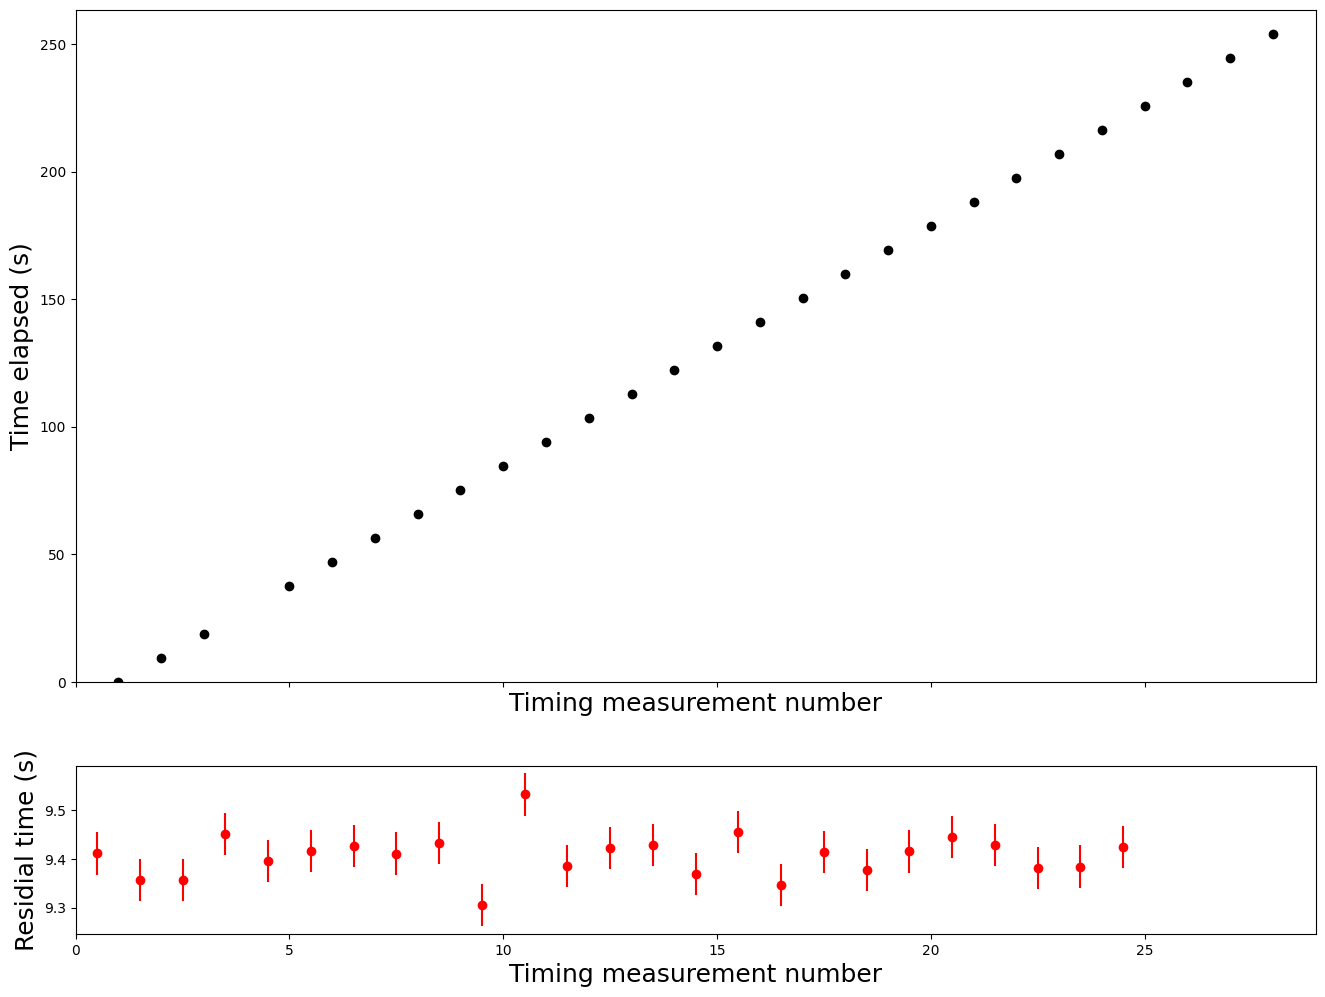

In [27]:
file_index = 3  # Change this index to read different files
data_example = read_data(filenames[file_index])
n, t = data_example['n'], data_example['t_s']
#finding the resudials
dt = t[1:] - t[:-1]
#eliminating the third dt value in [3]
if file_index == 3:
    dt = np.delete(dt, 2)




def linear(x, m, b):
    return m*x + b
def constant(x,b):
    return b

#fitting a line to the data since we are in low data we use iminuit unbinned likelihood
# m = Minuit(cost.UnbinnedNLL(linear, n, t, error=sig_t), m=1.0, b=0.0)


# Plotting
# Set your own values...
n_dt, dt, sig_t = time_diff(t)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))


ax[1].errorbar(n_dt, dt, yerr=sig_t, color='r', fmt='o')
ax[1].set_xlabel('Timing measurement number', fontsize=18)
ax[1].set_ylabel('Residial time (s)', fontsize=18)

/var/folders/lv/4tgtypmd2kg8ggv7vt0z73280000gn/T/ipykernel_14184/350174010.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


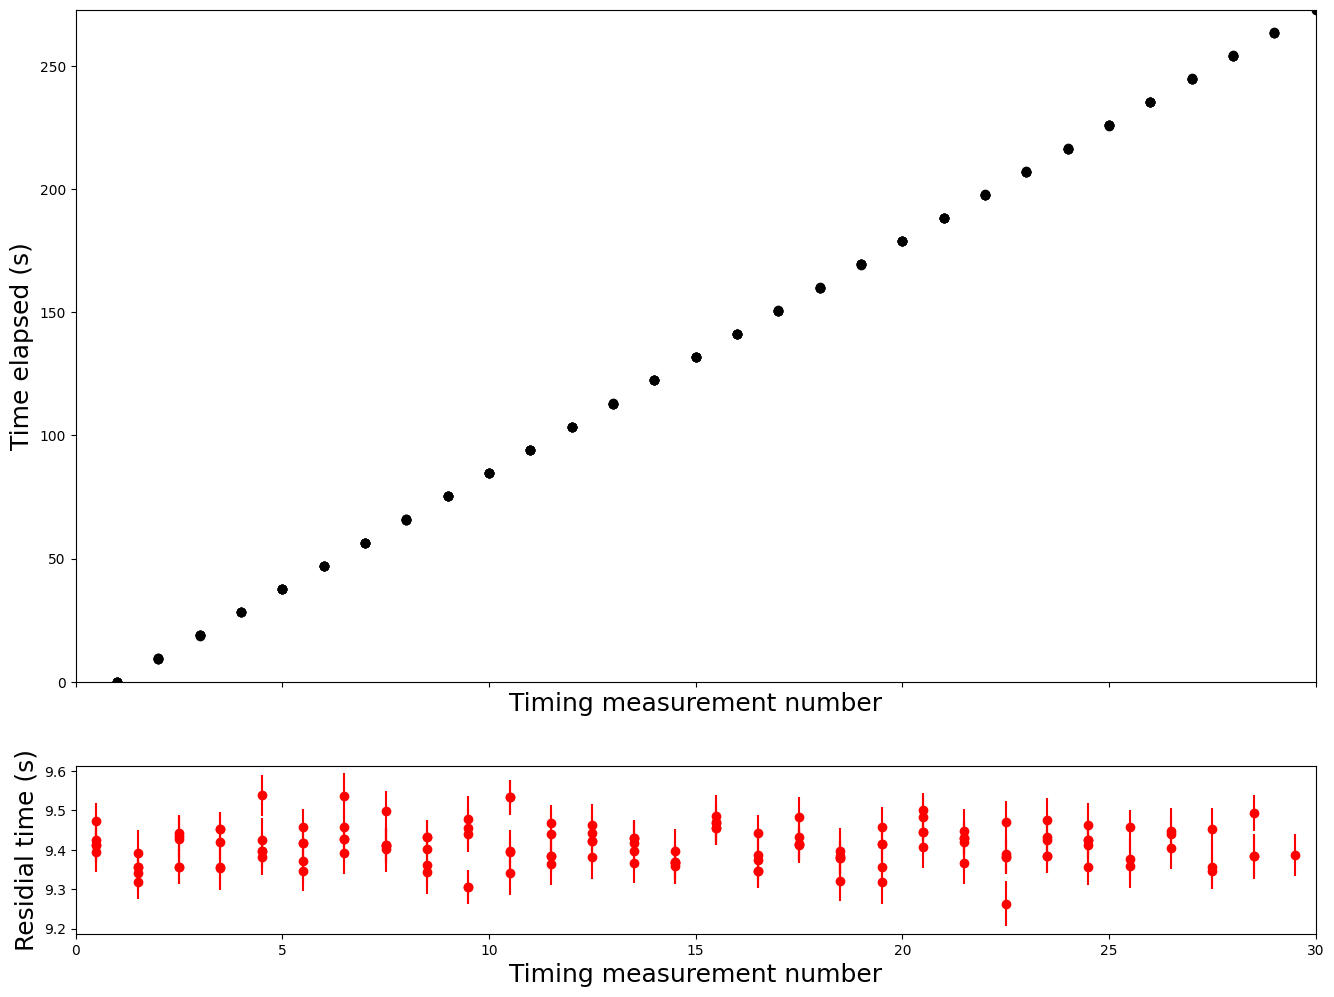

In [28]:
#combining all the datafiles in filenames into one array
all_data = np.array([], dtype=[('n', int), ('t_s', float)])
all_residuals = np.array([],dtype = [('n',float), ('dt',float),('sig_dt',float)])

for file in filenames:
    data = read_data(file)
    n_dt, dt, sig_t = time_diff(t)
    n = data['n']
    t = data['t_s']
    all_data = np.concatenate((all_data, data))
    all_residuals = np.concatenate((all_residuals, np.array(list(zip(n_dt, dt, np.full(len(dt), sig_t))), dtype=[('n', float), ('dt', float), ('sig_dt', float)])))

#plotting all the data
fig1, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax1[0].errorbar(all_data['n'], all_data['t_s'], yerr=sig_t, color='k', fmt='o')
ax1[0].set_xlabel('Timing measurement number', fontsize=18)
ax1[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax1[0].set(xlim=(0, all_data['n'][-1]+np.ediff1d(all_data['n'])[0]), ylim=(0, all_data['t_s'][-1]+np.ediff1d(all_data['t_s'])[0]))
ax1[1].errorbar(all_residuals['n'], all_residuals['dt'], yerr=all_residuals['sig_dt'], color='r', fmt='o')
ax1[1].set_xlabel('Timing measurement number', fontsize=18)
ax1[1].set_ylabel('Residial time (s)', fontsize=18)
fig1.show()

Mean of time differences: 9.41034 s, std: 0.04903 s


/var/folders/lv/4tgtypmd2kg8ggv7vt0z73280000gn/T/ipykernel_14184/3658817734.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


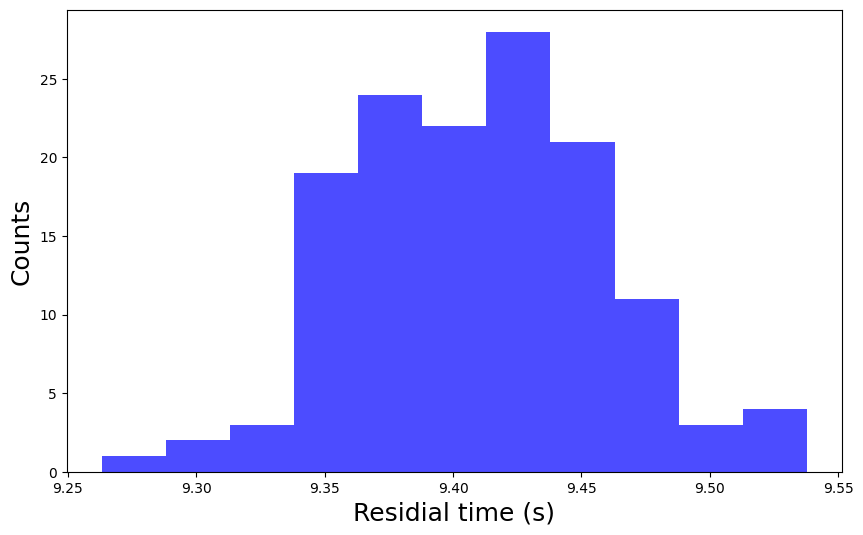

In [29]:
#plotting the time differences as a histogram
N_bins = int(np.sqrt(len(all_residuals['dt'])))
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.hist(all_residuals['dt'], bins=N_bins, color='b', alpha=0.7)
ax2.set_xlabel('Residial time (s)', fontsize=18)
ax2.set_ylabel('Counts', fontsize=18)
fig2.show()
print((f'Mean of time differences: {np.mean(all_residuals["dt"]):.5f} s, std: {np.std(all_residuals["dt"]):.5f} s'))

In [34]:
#fitting a constant to the time differences ie takin a mean value
T = np.mean(all_residuals['dt'])
T_weighted = np.average(all_residuals['dt'],weights = 1/all_residuals['sig_dt']**2)
error_weighted = np.sqrt(1/np.sum(1/all_residuals['sig_dt']**2))
print(f'Mean time difference: {T_weighted:.5f} ± {error_weighted:.5f} s')

Mean time difference: 9.41056 ± 0.00406 s


In [35]:
#setting a seed
blinding = True
np.random.seed(41)
blinding_factor = np.random.normal()
L = h_laser
sig_L = h_laser_sig
g = L * (2 * np.pi / T_weighted)**2
sig_g = g * np.sqrt((sig_L / L)**2 + (2 * sig_T / T_weighted)**2)
if blinding == True:
    g = g + blinding_factor
print(f'Calculated g: {g:.3f} +/- {sig_g:.3f} m/s^2')

Calculated g: 9.652 +/- 0.009 m/s^2


In [33]:
np.random.seed(41)
blinding_factor = np.random.normal()
L = h_tape
sig_L = h_tape_sig
g = L * (2 * np.pi / T)**2
sig_g = g * np.sqrt((sig_L / L)**2 + (2 * sig_T / T)**2)
if blinding == True:
    g = g + blinding_factor
print(f'Calculated g: {g:.3f} +/- {sig_g:.3f} m/s^2')

Calculated g: 9.605 +/- 0.009 m/s^2


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

In [11]:
#Cleaning the data by removing outliers using chauvenet's criterion
D_ball1 = np.array([10.00]) #±0.01 mm
D_ball2 = np.array([12.71])
D_ball3 = np.array([15.01])
#kommentar :-)

d_rail = 6.04 #mm

Angle = np.array([76.35, 76.05])

h = 22.24
l = 90.07
d = np.array([])
90-Angle

array([13.65, 13.95])

In [12]:
h_laser_arr = np.array([22.254,22.261,22.259,22.261,22.257])
h_laser = np.mean(h_laser_arr)
h_laser_sig = np.std(h_laser_arr)/np.sqrt(len(h_laser_arr))

print(f'Height measured by laser: {h_laser:.3f} +/- {h_laser_sig:.3f} m')

Height measured by laser: 22.258 +/- 0.001 m


In [13]:
h_top_off_weight,sig_h_top_off_weight = [67.49,] - 56
height_weight,sig_height_weight = [59.05,] - 56
cm_from_floor,sig_cm_from_floor = h_top_off_weight - height_weight/2


TypeError: unsupported operand type(s) for -: 'list' and 'int'